## Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


## Load The Dataset

In [3]:
file_path = 'Online Sales Data.csv'
data = pd.read_csv(file_path)

## Data Overview

In [4]:
print(f"Total number of transactions: {data.shape[0]}")
print(f"Time range of the sales data: {data['Date'].min()} to {data['Date'].max()}")

Total number of transactions: 240
Time range of the sales data: 2024-01-01 to 2024-08-27


## Sales Performance

In [5]:
total_revenue = data['Total Revenue'].sum()
average_unit_price = data['Unit Price'].mean()
min_unit_price = data['Unit Price'].min()
max_unit_price = data['Unit Price'].max()


In [6]:
print(f"Total revenue generated: ${total_revenue}")
print(f"Average unit price: ${average_unit_price}")
print(f"Minimum unit price: ${min_unit_price}")
print(f"Maximum unit price: ${max_unit_price}")

Total revenue generated: $80567.84999999999
Average unit price: $236.3955833333333
Minimum unit price: $6.5
Maximum unit price: $3899.99


## Product Analysis

In [7]:
revenue_by_category = data.groupby('Product Category')['Total Revenue'].sum()
units_sold_by_product = data.groupby('Product Name')['Units Sold'].sum()
revenue_distribution = data.groupby('Product Category')['Total Revenue'].sum()

## Plot revenue distribution across product categories

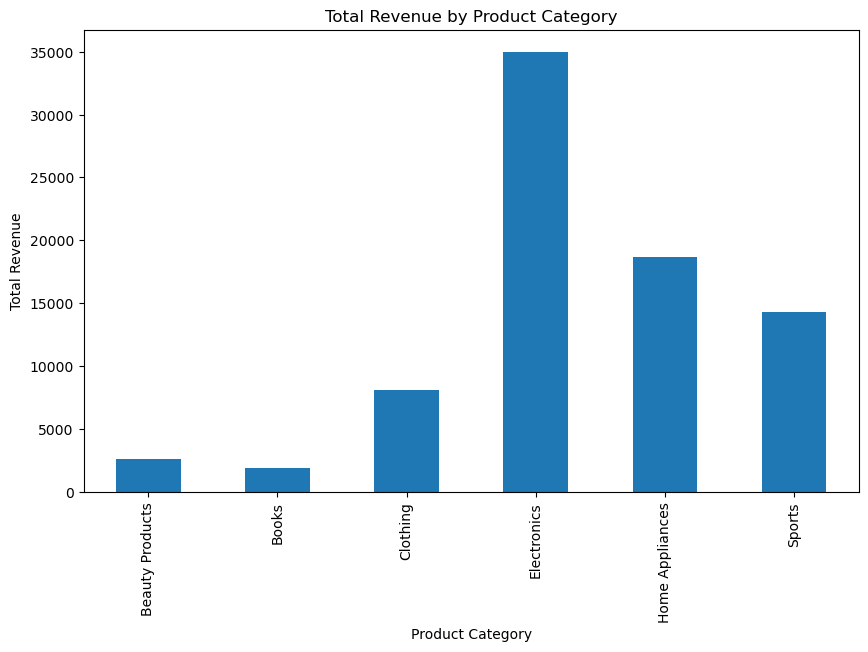

In [8]:
plt.figure(figsize=(10, 6))
revenue_distribution.plot(kind='bar')
plt.title('Total Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.show()

## Sales Trends

In [9]:
data['Date'] = pd.to_datetime(data['Date'])
monthly_sales = data.set_index('Date').resample('M').agg({'Total Revenue': 'sum', 'Units Sold': 'sum'})


## Plot monthly sales trends

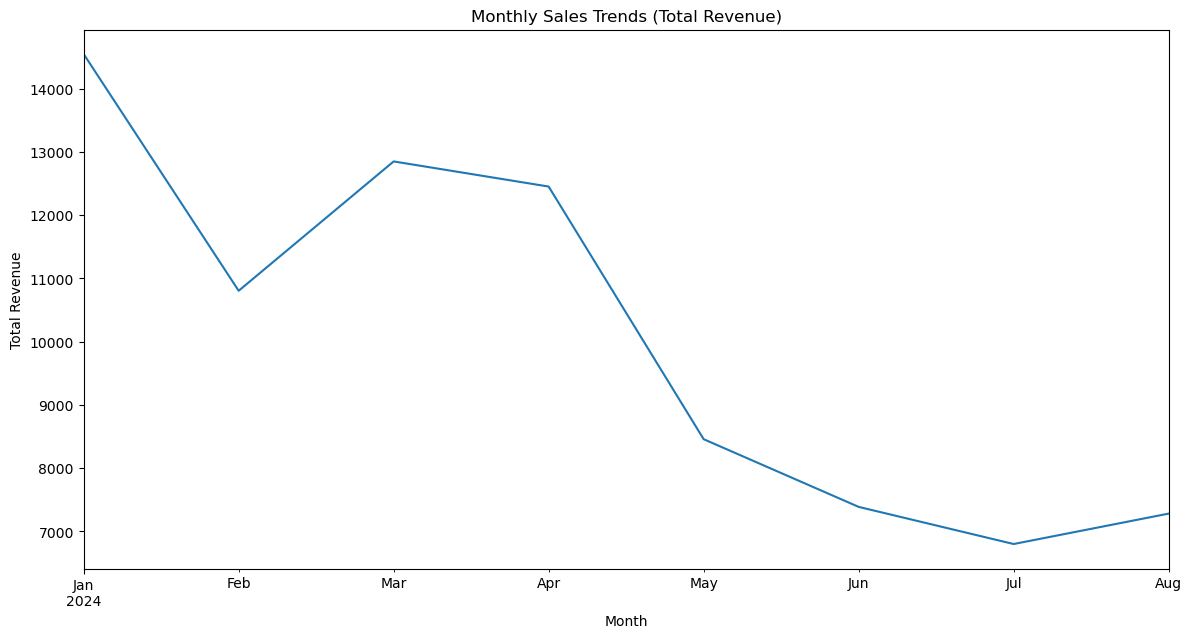

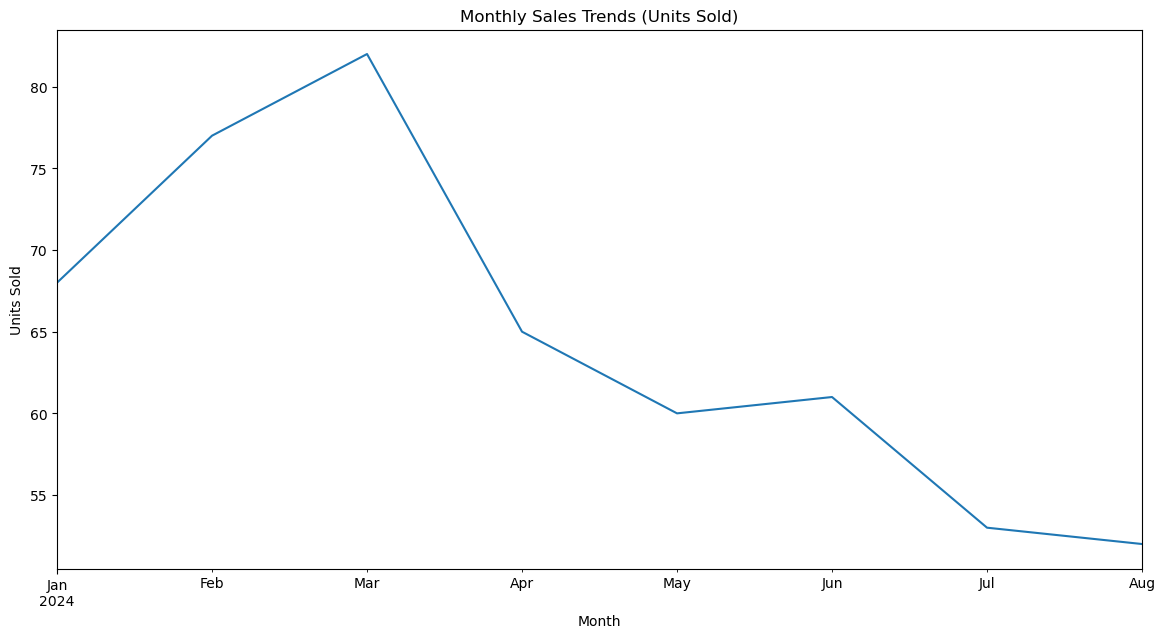

In [10]:
plt.figure(figsize=(14, 7))
monthly_sales['Total Revenue'].plot()
plt.title('Monthly Sales Trends (Total Revenue)')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

plt.figure(figsize=(14, 7))
monthly_sales['Units Sold'].plot()
plt.title('Monthly Sales Trends (Units Sold)')
plt.xlabel('Month')
plt.ylabel('Units Sold')
plt.show()

## Regional Analysis

In [11]:
revenue_by_region = data.groupby('Region')['Total Revenue'].sum()

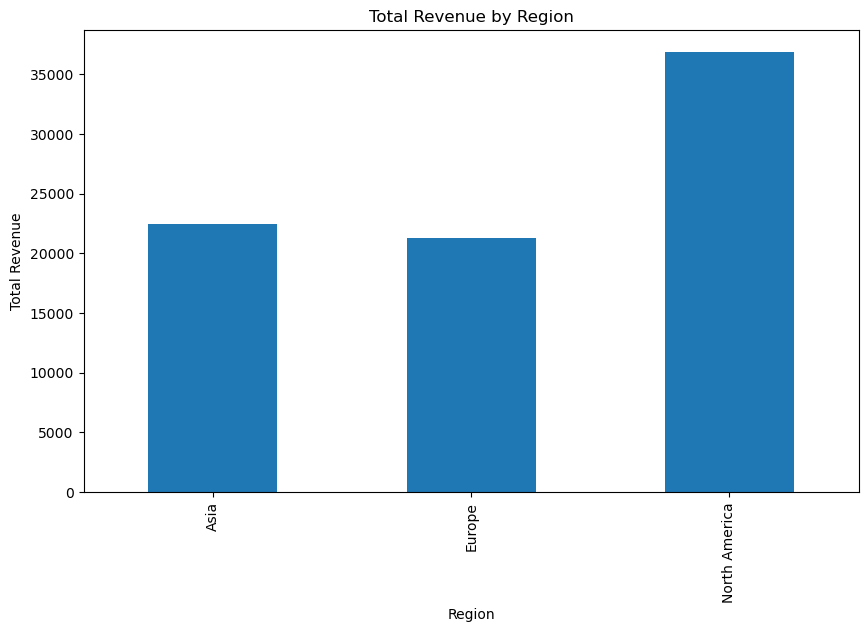

In [12]:
plt.figure(figsize=(10, 6))
revenue_by_region.plot(kind='bar')
plt.title('Total Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.show()

## Payment Methods

In [13]:
payment_method_counts = data['Payment Method'].value_counts()
revenue_by_payment_method = data.groupby('Payment Method')['Total Revenue'].sum()

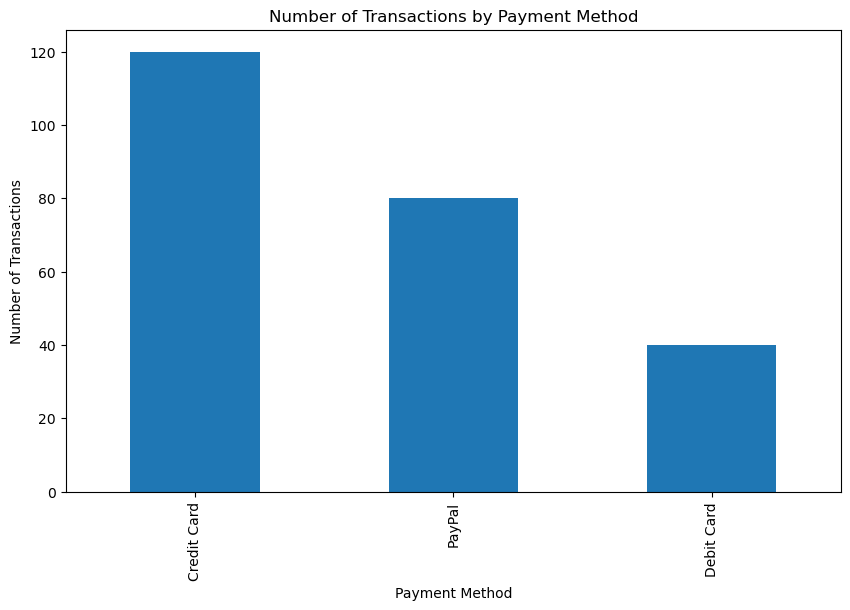

In [14]:
plt.figure(figsize=(10, 6))
payment_method_counts.plot(kind='bar')
plt.title('Number of Transactions by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Number of Transactions')
plt.show()

## Customer Behaviour

In [15]:
average_units_per_transaction = data['Units Sold'].mean()
multiple_units_transactions = data[data['Units Sold'] > 1].shape[0]

print(f"Average number of units sold per transaction: {average_units_per_transaction}")
print(f"Number of transactions involving multiple units: {multiple_units_transactions}")


Average number of units sold per transaction: 2.158333333333333
Number of transactions involving multiple units: 143


## Top Performer

In [17]:
top_product_by_category = data.groupby('Product Category').apply(lambda x: x.loc[x['Total Revenue'].idxmax()])

## Top 10 highest-grossing transaction 

In [24]:
top_10_transactions = data.nlargest(10, 'Total Revenue')
print(top_10_transactions)

     Transaction ID       Date Product Category  \
102           10103 2024-04-12      Electronics   
85            10086 2024-03-26  Home Appliances   
6             10007 2024-01-07      Electronics   
216           10217 2024-08-04      Electronics   
0             10001 2024-01-01      Electronics   
35            10036 2024-02-05           Sports   
72            10073 2024-03-13      Electronics   
37            10038 2024-02-07  Home Appliances   
138           10139 2024-05-18      Electronics   
12            10013 2024-01-13      Electronics   

                          Product Name  Units Sold  Unit Price  Total Revenue  \
102                Canon EOS R5 Camera           1     3899.99        3899.99   
85                          LG OLED TV           2     1299.99        2599.98   
6                  MacBook Pro 16-inch           1     2499.99        2499.99   
216          Apple MacBook Pro 16-inch           1     2399.00        2399.00   
0                        iPhone 1

## Sales by Date

In [23]:
peak_sales_days = data.groupby('Date').agg({'Total Revenue': 'sum', 'Units Sold': 'sum'}).nlargest(5, 'Total Revenue')
print(peak_sales_days)

            Total Revenue  Units Sold
Date                                 
2024-04-12        3899.99           1
2024-03-26        2599.98           2
2024-01-07        2499.99           1
2024-08-04        2399.00           1
2024-01-01        1999.98           2


## Weekend vs Weekday Sales

In [26]:
data['Day of Week'] = data['Date'].dt.dayofweek
weekend_sales = data[data['Day of Week'] >= 5]['Total Revenue'].sum()
weekday_sales = data[data['Day of Week'] < 5]['Total Revenue'].sum()

print(f"Total weekend sales revenue: ${weekend_sales}")
print(f"Total weekday sales revenue: ${weekday_sales}")

Total weekend sales revenue: $22647.32
Total weekday sales revenue: $57920.53


## Outliers & Anomalies

In [28]:
outliers_unit_price = data[data['Unit Price'] > data['Unit Price'].quantile(0.95)]
outliers_total_revenue = data[data['Total Revenue'] > data['Total Revenue'].quantile(0.95)]
print(outliers_unit_price, outliers_total_revenue)

     Transaction ID       Date Product Category  \
0             10001 2024-01-01      Electronics   
6             10007 2024-01-07      Electronics   
35            10036 2024-02-05           Sports   
66            10067 2024-03-07      Electronics   
72            10073 2024-03-13      Electronics   
85            10086 2024-03-26  Home Appliances   
95            10096 2024-04-05           Sports   
102           10103 2024-04-12      Electronics   
132           10133 2024-05-12      Electronics   
138           10139 2024-05-18      Electronics   
162           10163 2024-06-11      Electronics   
216           10217 2024-08-04      Electronics   

                          Product Name  Units Sold  Unit Price  Total Revenue  \
0                        iPhone 14 Pro           2      999.99        1999.98   
6                  MacBook Pro 16-inch           1     2499.99        2499.99   
35                        Peloton Bike           1     1895.00        1895.00   
66          

## Sales Prediction

In [29]:
features = ['Product Category', 'Unit Price', 'Units Sold', 'Region', 'Payment Method']
data_encoded = pd.get_dummies(data, columns=features, drop_first=True)
X = data_encoded.drop(['Transaction ID', 'Date', 'Product Name', 'Total Revenue'], axis=1)
y = data_encoded['Total Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Sales prediction model RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")

Sales prediction model RMSE: 1032399270270.9784


## Customer Segmentation

In [31]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=5, random_state=42)
data['Customer Segment'] = kmeans.fit_predict(X_scaled)


C:\Users\amkad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\amkad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


## Demand Forecasting


In [32]:
data.set_index('Date', inplace=True)
product_category_sales = data.groupby([pd.Grouper(freq='M'), 'Product Category'])['Units Sold'].sum().unstack()


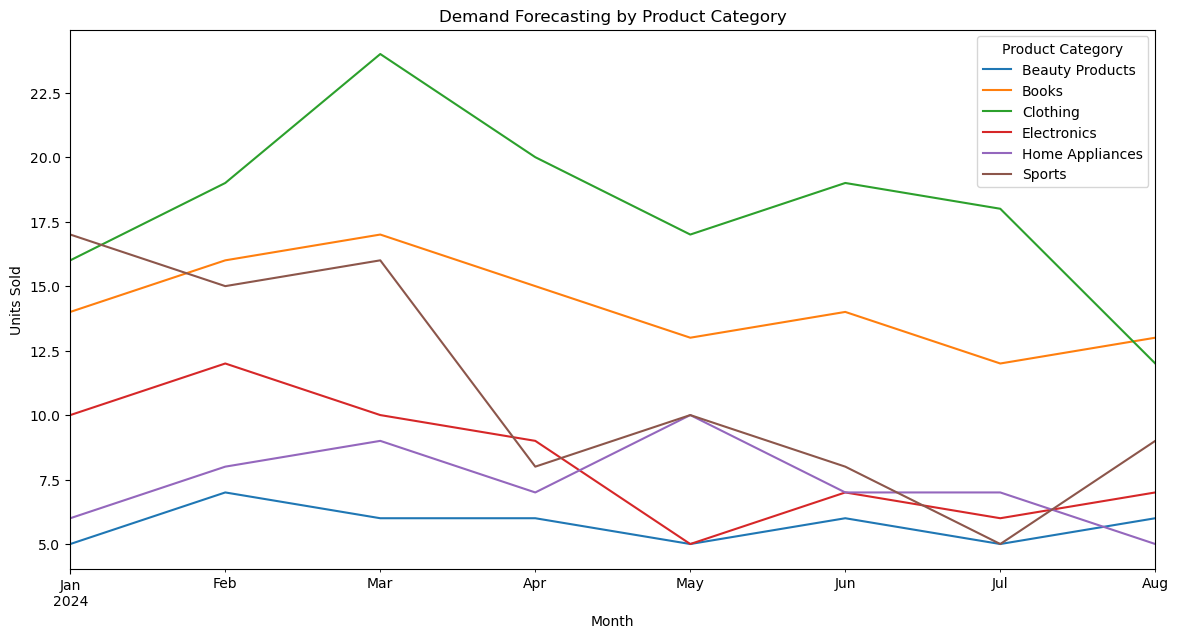

In [33]:
product_category_sales.plot(figsize=(14, 7))
plt.title('Demand Forecasting by Product Category')
plt.xlabel('Month')
plt.ylabel('Units Sold')
plt.show()